In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sk
from sklearn import tree
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score

In [2]:
def scaleData(dataFrame,flag):
    df = dataFrame.copy()

    for var in df:
        mean = df[var].mean()
        std = df[var].std()
        l1 = (df[var].abs()).sum()

        if(flag == 1):
            df[var] = (df[var]-mean)/std
        else:
            df[var] = df[var]/l1

    return df

In [48]:
dfProbeA = pd.read_csv('./UKSA/probeA.csv', header = 0)
dfScProbeA = scaleData(dfProbeA, 1)

dfProbeB = pd.read_csv('./UKSA/probeB.csv', header = 0)
dfScProbeB = scaleData(dfProbeB, 1)

dfClassA = pd.read_csv('./UKSA/classA.csv', header = 0)

In [49]:
dfTarget = dfProbeA[['TNA']]
dfScProbeA = dfScProbeA.drop('TNA',axis=1)


In [50]:
dTree = tree.DecisionTreeRegressor(max_features = 3)
dTree.fit(dfScProbeA, dfTarget)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=3,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [51]:
predict = dTree.predict(dfScProbeA)


In [54]:
dTree = tree.DecisionTreeRegressor(max_features = 3)
scores = cross_val_score(dTree, dfScProbeA, dfTarget, cv=10, scoring='r2')
print (scores.mean())

0.326269018485


In [58]:


lasso = sk.LassoCV(alphas=np.arange(-0.1,0.01,0.0005))
lasso.fit(dfScProbeA, dfClassA)
print (lasso.alpha_, lasso.coef_)



/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


0.0095 [-0.          0.          0.22212756 -0.          0.          0.00343789
  0.05811856 -0.00091438  0.03391407  0.          0.11796244  0.        ]


(0.0001, 0.31622776601683794)

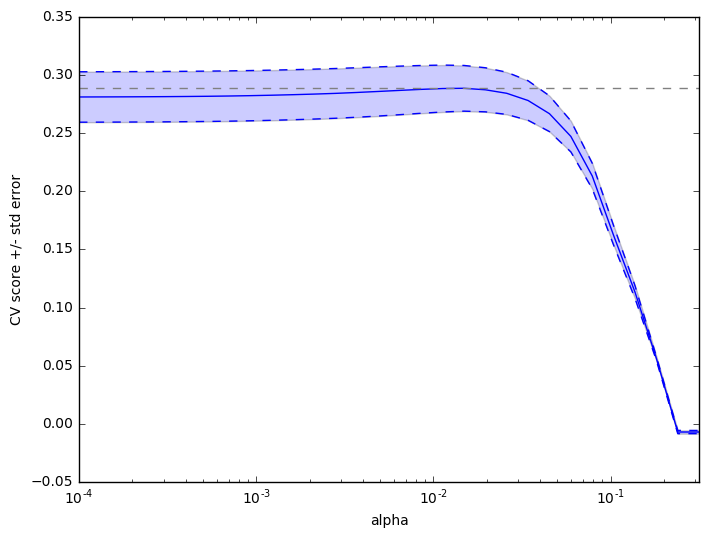

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

scores = list()
scores_std = list()

n_folds = 10

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, dfScProbeA, dfClassA, cv=n_folds, n_jobs=1, scoring='r2')
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [ ]:
np.savetxt("predictTNA.csv", predict, delimiter=",")
